In [14]:
import pandas as pd
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
nltk.download('stopwords')

df= pd.read_csv('ikn.csv')

print("\n5 baris pertama dari dataset ikn:")
print(df.head())

print("\ninformasi dataset:\n")
df.info()

print("\ndistribusi sentimen:\n")
print(df['sentiment'].value_counts())

df= df.rename(columns={'sentiment': 'sentimen'})

print("\ndataset sudah diperbaiki:\n")
print(df.head())

#menghapus data yang kosong (jika ada)
df.dropna(inplace=True)

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

stop_words.add("jawa")
stop_words.add("timur")
stop_words.add("kalimantan")
stop_words.add("ibu")
stop_words.add("kota")
stop_words.add("ikn")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()

    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(filtered_words)

print("\npre-processing dimulai...")
df['tweet_bersih'] = df['tweet'].apply(preprocess_text)

print("pre-processing selesai")
print(df[['tweet', 'tweet_bersih']].head)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



5 baris pertama dari dataset ikn:
                                               tweet sentiment
0  @jokowi saya sangat setuju pak bahkan lebih se...  positive
1  @hnurwahid @FPKSDPRRI Saya setuju ibu kota pin...  positive
2  @MardaniAliSera @FPKSDPRRI Saya dan mayoritas ...  positive
3  cocok ibu kota pindah ke kalimantan apalagi gu...  positive
4  @geedeulbeyou1 Jadi kepada lo yang gak setuju ...  positive

informasi dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      1464 non-null   object
 1   sentiment  1464 non-null   object
dtypes: object(2)
memory usage: 23.0+ KB

distribusi sentimen:

sentiment
positive    1029
negative     435
Name: count, dtype: int64

dataset sudah diperbaiki:

                                               tweet  sentimen
0  @jokowi saya sangat setuju pak bahkan lebih se...  positive
1  @hnurwahid @F

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['tweet_bersih'])
y = df['sentimen']

print("Ukuran matriks fitur (X):", X.shape)

Ukuran matriks fitur (X): (1464, 4315)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print("Laporan Klasifikasi:\n", report)
print(f"Akurasi model:, {accuracy*100:2f}%")
print("\nLaporan:\n", report)

Laporan Klasifikasi:
               precision    recall  f1-score   support

    negative       0.82      0.56      0.67        84
    positive       0.84      0.95      0.89       209

    accuracy                           0.84       293
   macro avg       0.83      0.76      0.78       293
weighted avg       0.84      0.84      0.83       293

Akurasi model:, 83.959044%

Laporan:
               precision    recall  f1-score   support

    negative       0.82      0.56      0.67        84
    positive       0.84      0.95      0.89       209

    accuracy                           0.84       293
   macro avg       0.83      0.76      0.78       293
weighted avg       0.84      0.84      0.83       293



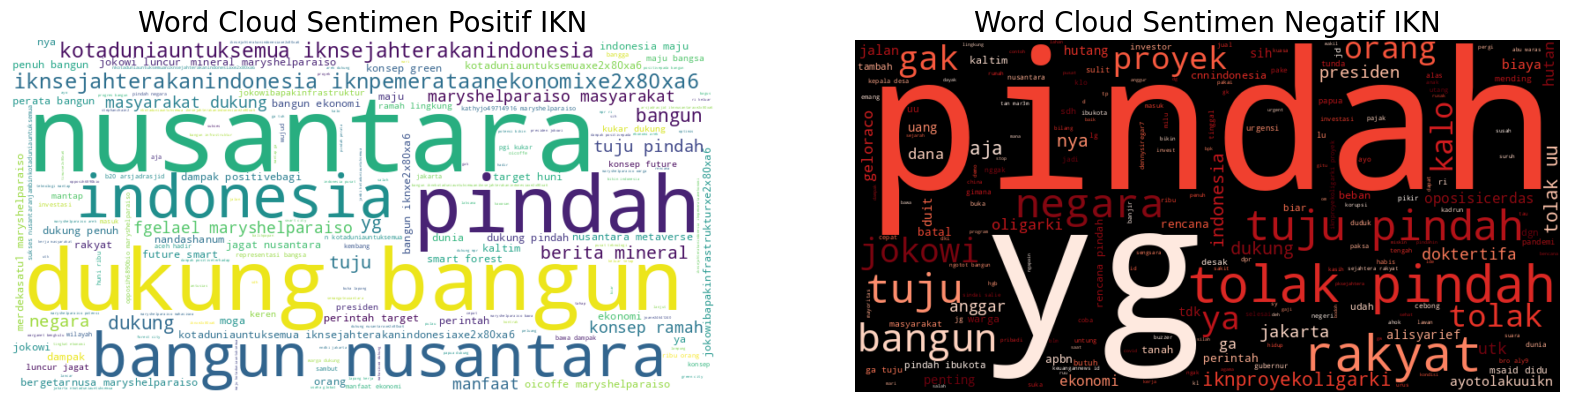

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

teks_positif = " ".join(df[df['sentimen'] == 'positive']['tweet_bersih'])
teks_negatif = " ".join(df[df['sentimen'] == 'negative']['tweet_bersih'])

wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(teks_positif)
wordcloud_negatif = WordCloud(width=800, height=400, background_color='black', colormap = 'Reds').generate(teks_negatif)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title("Word Cloud Sentimen Positif IKN", fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title("Word Cloud Sentimen Negatif IKN", fontsize=20)
plt.axis('off')

plt.show()
